<a href="https://colab.research.google.com/github/AdriVilla/-Ensemble-Techniques/blob/main/Adriana_Villa_Project_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data =pd.read_csv("EasyVisa.csv")
df = data.copy()

## Data Overview

- Observations
- Sanity checks

#### Sanity Check

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Observations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are 9 object features
* There are 1 float features
* There are 2 int features

In [ ]:
df.shape

(25480, 12)

* The database has 25,480 observations and 12 features (variables). 
* There are no missing values 

In [ ]:
print(df.continent.value_counts())
print(df.education_of_employee.value_counts())
print(df.has_job_experience.value_counts())
print(df.requires_job_training.value_counts())
print(df.region_of_employment.value_counts())
print(df.unit_of_wage.value_counts())
print(df.full_time_position.value_counts())
print(df.case_status.value_counts())


Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Object features:
* continent: This object variable has 6 categories where "Asia" is the most frequent.
* education_of_employee: This object variable has 4 categories where "Bachelor's" is the most frequent.
* has_job_experience: This is a binary variable yes/no where "yes" is the most frequent.
* requires_job_training: This is a binary variable yes/no where "no" is the most frequent.
* region_of_employment: This object variable has 5 categories where "Northeast" is the most frequent.
* unit_of_wage: This object variable has 4 categories where "year" is the most frequent.
* full_time_position: This is a binary variable yes/no where "yes" is the most frequent.
* case_status: This is a binary variable certified/not certified where "certified" is the most frequent.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Numerical features:

* no_of_employees: This numerical variable has a minimum value of -26 and a maximum value of 602,069. The median value is 2,109. It makes no sense to have negative number of employees. These values will be further analyzed.
* yr_of_estab: This numerical variable has a minimum value of 1,800 and a maximum value of 2016. The median value is 1997. 
* prevailing_wage: This numerical variable has a minimum value of 2.14 and a maximum value of 319,210.27. The median value is 70,308.21. These values will be further analyzed.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Univariate EDA

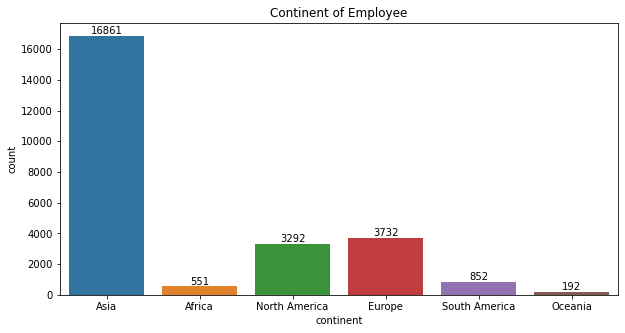

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "continent")
ax.bar_label(ax.containers[0])
plt.title('Continent of Employee');

* Most applicants come from Asia. 
* Europe and North America are the second and third continents from where applicants come.

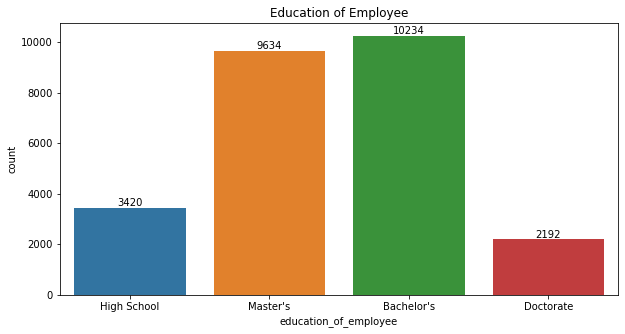

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "education_of_employee")
ax.bar_label(ax.containers[0])
plt.title('Education of Employee');

* The majority of the applicants have a Bachelor's degree as their highest degree followed by Master's degree.
* Only 2,192 (8%) applicants have a doctorate.
* There are 3,420 (13%) applicants with High School as their highest academic level. 

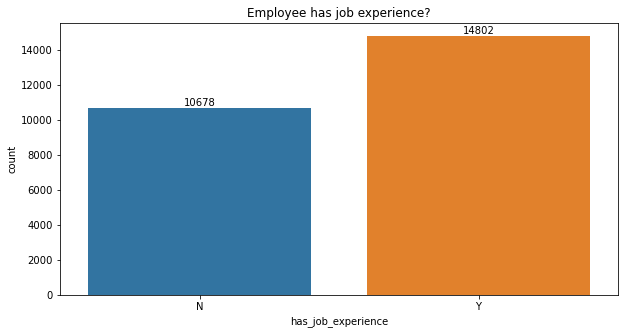

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "has_job_experience")
ax.bar_label(ax.containers[0])
plt.title('Employee has job experience?');

* The majority of the applicants have job experience, however, 42% of the applicants do not have previous job experience.

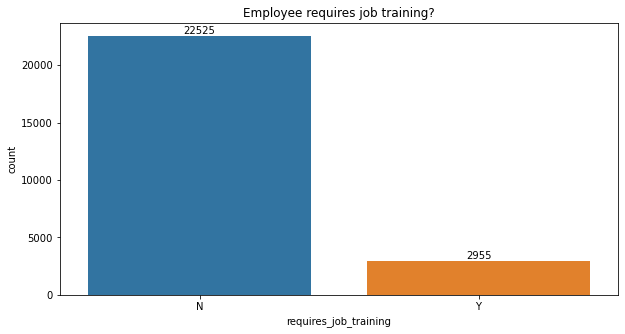

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "requires_job_training")
ax.bar_label(ax.containers[0])
plt.title('Employee requires job training?');

* Most of the applicants do not require job training. 
* Only 12% of the applicants need job training

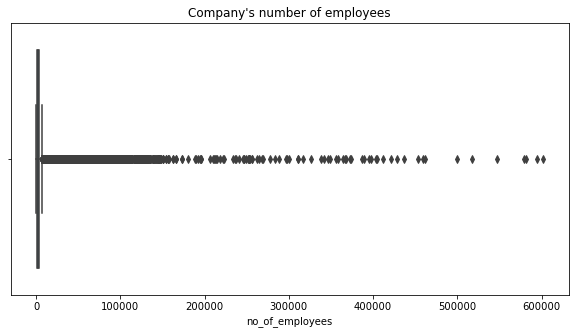

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x= "no_of_employees")
plt.title("Company's number of employees");

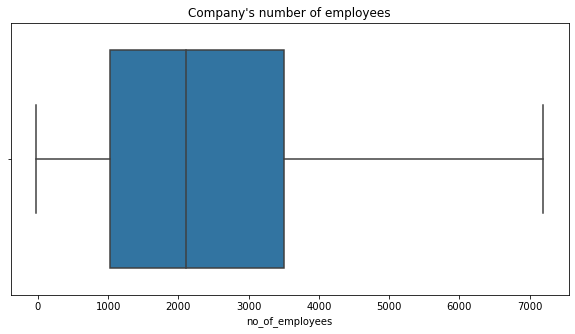

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x= "no_of_employees", showfliers=False)
plt.title("Company's number of employees");

In [ ]:
df["no_of_employees"].median()

2109.0

In [ ]:
print("Max:",df["no_of_employees"].max())
print("Min:",df["no_of_employees"].min())
print("Median:",df["no_of_employees"].median())

Max: 602069
Min: -26
Median: 2109.0


In [ ]:
df[df["no_of_employees"].between(7100,602069)].shape[0]

1563

* Number of employees is skewed to the right.
* Outliers belong to range 7,100 - 602,069. This observations represent 6.13% of the data and will be taken as real values.
* The median number of employees is 2,109.

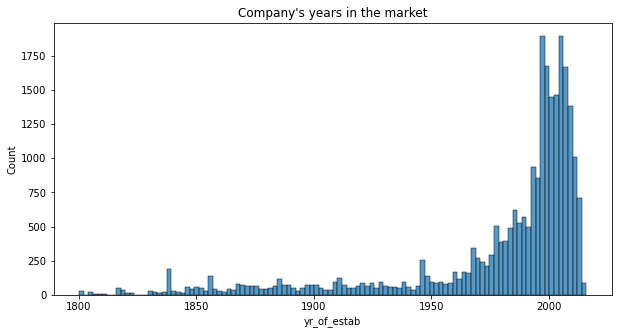

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(data=df, x= "yr_of_estab")
plt.title("Company's years in the market");

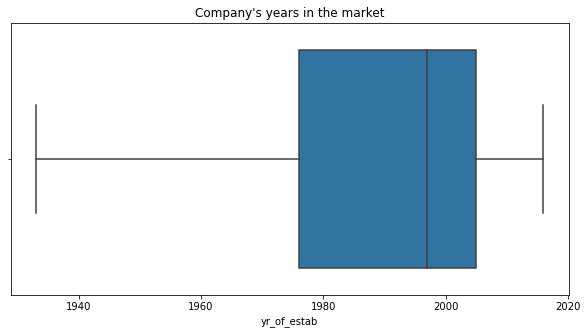

In [ ]:
plt.figure(figsize= (10,5))
bp_year = sns.boxplot(data=df, x= "yr_of_estab", showfliers=False)
plt.title("Company's years in the market");

In [ ]:
print("Max:",df["yr_of_estab"].max())
print("Min:",df["yr_of_estab"].min())
print("Median:",df["yr_of_estab"].median())

Max: 2016
Min: 1800
Median: 1997.0


In [ ]:
df[df["yr_of_estab"].between(1800,1930)].shape[0]

3198

* Years of establishment is skewed to the left. 
* Outliers belong to range 1800 - 1930. This observations represent 12.55% of the data and will be taken as real values.
* The median year of establishment is 1997.

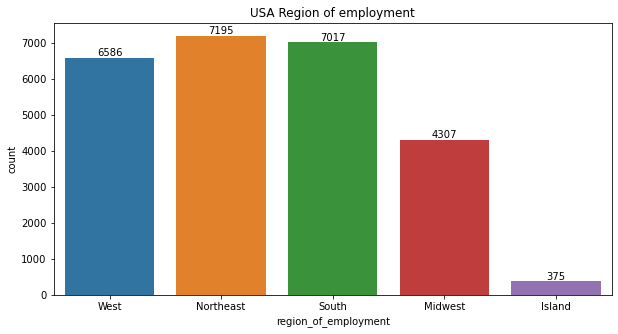

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "region_of_employment")
ax.bar_label(ax.containers[0])
plt.title('USA Region of employment');

* Northeast, followed by South and West are the most popular regions of employment. 
* Island is the least popular with just 375 observations. 

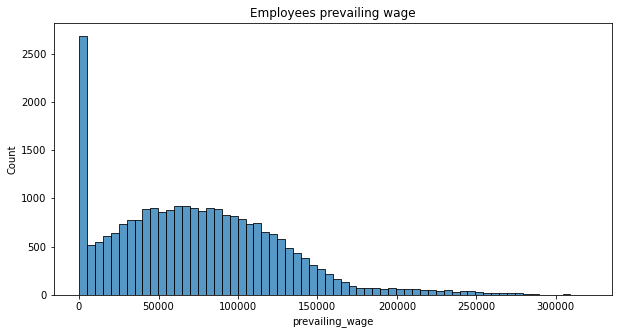

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(data=df, x= "prevailing_wage")
plt.title("Employees prevailing wage");

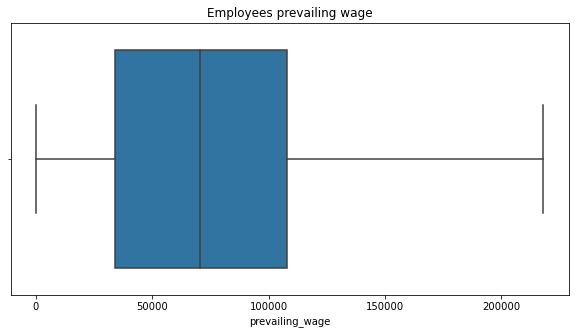

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x= "prevailing_wage", showfliers=False)
plt.title("Employees prevailing wage");

In [ ]:
print("Max:",df["prevailing_wage"].max())
print("Min:",df["prevailing_wage"].min())
print("Median:",df["prevailing_wage"].median())

Max: 319210.27
Min: 2.1367
Median: 70308.20999999999


In [ ]:
df[df["prevailing_wage"].between(250000,319210.27)].shape[0]

164

* Prevailing wage is skewed to the right.
* Outliers belong to range 250,000 - 319,210.27. This observations represent 0.6% of the data and will be taken as real values. This 164 values wil be revised and double checked to see is the "unit_wage" makes sense.
* The median prevailing wage is 70,308.20 dollars.

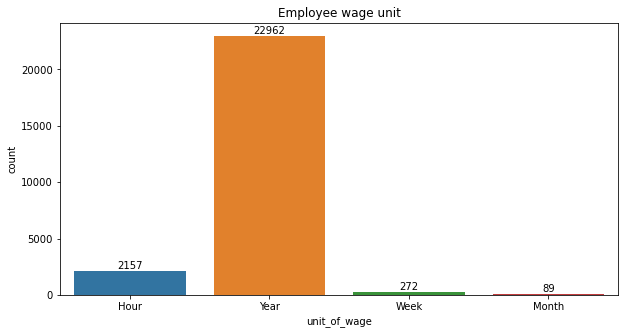

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "unit_of_wage")
ax.bar_label(ax.containers[0])
plt.title('Employee wage unit');

* Yearly "unit_wage" is the most common with 90.11% of the observations.
* Hourly wages are the second, followed by weekly wages. Both sum up  9.5% of the observations. 
* Monthly wages come last with only 89 observations. 


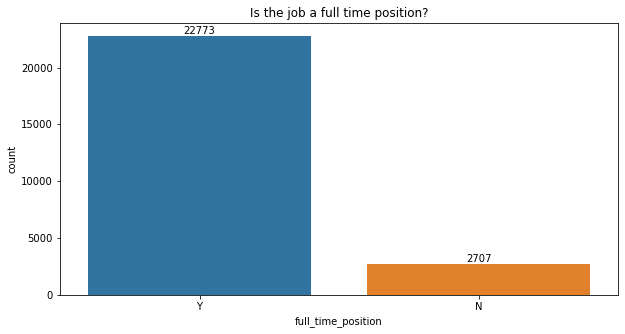

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "full_time_position")
ax.bar_label(ax.containers[0])
plt.title('Is the job a full time position?');

* The majority of candidates apply with full-time positions vs 10% who don't.

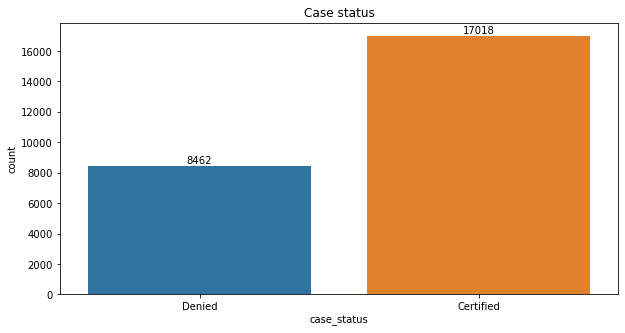

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.countplot(data= df, x= "case_status")
ax.bar_label(ax.containers[0])
plt.title('Case status');

* Most of the cases get certified. 
* 67% of cases got certified, and 33% did not. 

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192


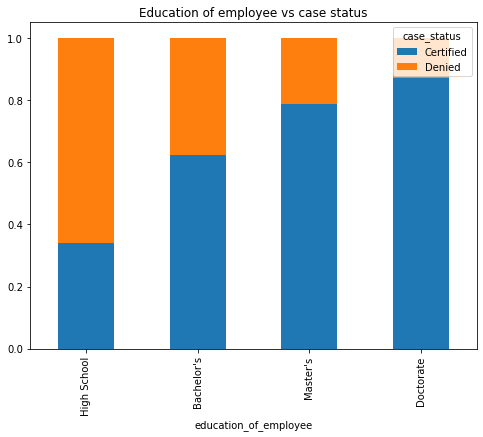

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['education_of_employee'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['education_of_employee'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Education of employee vs case status');



* Applicants that have "high school" as their highest education level get denied the most.
* Applicants with doctorates as their highest education level get certified the most, followed by applicants with master's degrees.

2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192


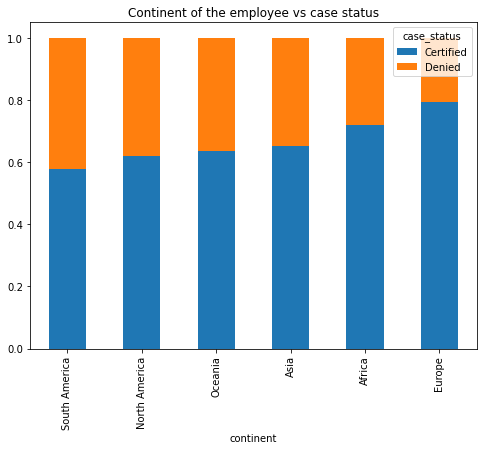

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['continent'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['continent'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Continent of the employee vs case status');

* Applicants from South America get rejected the most, followed by applicants from North America.
* Applicants from Europe get Certified the most, followed by applicants from Africa. 

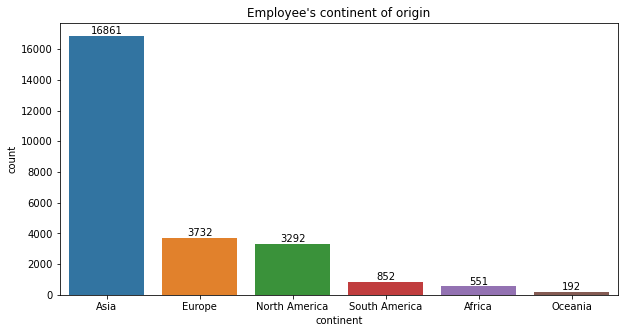

In [ ]:
plt.figure(figsize= (10,5))
ax= sns.countplot(data = df, x= 'continent', order= df['continent'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Employee's continent of origin");

* More than half the observations (66%) correspond to applicants that come from Asia.
* Europe and North America come second and third.
* Oceania is the continent where least of the applicants come from. 
* There are only 551 applicants from Africa and are the second continent with the most certified rate.

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802


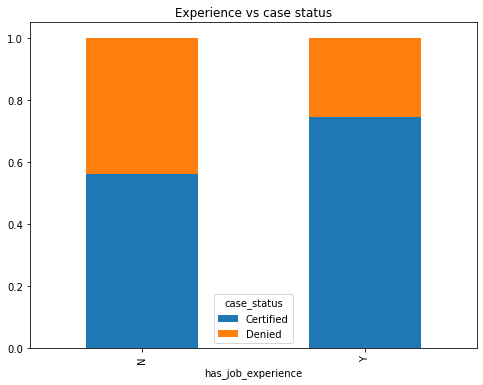

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['has_job_experience'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['has_job_experience'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Experience vs case status');

* Work experience does help on getting certified. Applicants with previous experience get certified the most. 

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89


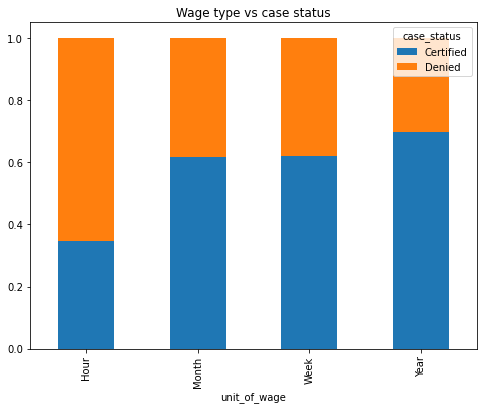

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['unit_of_wage'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['unit_of_wage'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Wage type vs case status');

* Applicants with a yearly wage unit get certified the most, while applicants with an hourly wage get rejected the most.
* Applicants with monthly and weekly get certified the most compared to hourly wages, and are just slightly behind in being certified in comparison to yearly wages. 


5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

<Figure size 720x360 with 0 Axes>

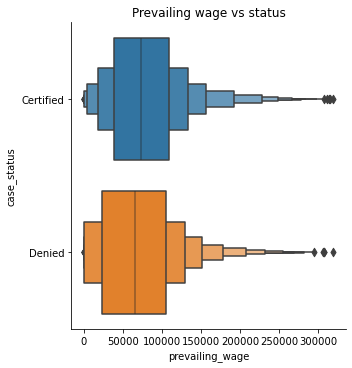

In [ ]:
plt.figure(figsize= (10,5))
sns.catplot(data=df.sort_values("prevailing_wage"), y="case_status", x="prevailing_wage", kind="boxen")
plt.title("Prevailing wage vs status");

* Applicants who get certified have a higher median wage. 
* Wages are lower in Q1 for applicants who are denied.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Duplicate values treatment

In [ ]:
df.duplicated().sum()

0

#### Missing values

In [ ]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Outlier detection and treatment

In [ ]:
df._get_numeric_data().columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

#### Analyzing "prevailing_wage"

Wages in USA:

USA minimum wage determined by the Department of Labor is 7.25 dollars per hour.

In [ ]:
df["prevailing_wage"].max()

319210.27

In [ ]:
df["prevailing_wage"].min()

2.1367

[2.1367, 218094.61]

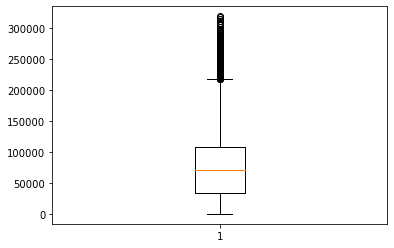

In [ ]:
# Getting lower and upper whiskers for "prevailing_wage"
B = plt.boxplot(data=df, x ='prevailing_wage')
[item.get_ydata()[1]  for item in B['whiskers']]

In [ ]:
df[df['prevailing_wage'].between(218094.61,319210.27)].shape[0]

428

In [ ]:
df['unit_of_wage'].value_counts(normalize = True)

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

In [ ]:
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

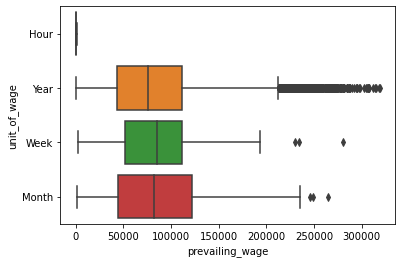

In [ ]:
sns.boxplot(data= df, y= 'unit_of_wage', x= "prevailing_wage");

* Outliers are concentrated in "yearly" wages.
* Yearly wages between 218094.61 - 319210.27 are plausible, hence they will be taken as real values.

In [ ]:
wage_year = df[df['unit_of_wage'] == "Year"]

In [ ]:
wage_year.shape[0]

22962

In [ ]:
print("Min yearly wage:",wage_year["prevailing_wage"].min())
print("Max yearly wage:",wage_year["prevailing_wage"].max())

Min yearly wage: 100.0
Max yearly wage: 319210.27


In [ ]:
# Plausible yearly wage based on the USA Labor Department minimum wage of 7.25 dolars x hour.
wage_year[wage_year["prevailing_wage"].between(0,13920)].shape[0]

1465

* There are 1,465 applicants that are earning less than the minimum yearly wage.

In [ ]:
wage_hour = df[df['unit_of_wage'] == "Hour"]

In [ ]:
wage_hour.shape[0]

2157

In [ ]:
print("Min hourly wage:",wage_hour["prevailing_wage"].min())
print("Max hourly wage:",wage_hour["prevailing_wage"].max())

Min hourly wage: 2.1367
Max hourly wage: 999.9195


In [ ]:
wage_hour[wage_hour["prevailing_wage"].between(2.1367,7.25)].shape[0]

11

* Minimum wage in USA is 7.25 dollars per hour and there are applicants earning less than what the law dictates.

In [ ]:
wage_week = df[df['unit_of_wage'] == "Week"]

In [ ]:
wage_week.shape[0]

272

In [ ]:
print("Min weekly wage:",wage_week["prevailing_wage"].min())
print("Max weekly wage:",wage_week["prevailing_wage"].max())

Min weekly wage: 2183.23
Max weekly wage: 280175.95


In [ ]:
# weekly minimum wage (7.25 x hour).
wage_week[wage_week["prevailing_wage"].between(0,290)].shape[0]

0

* There are no observations below the weekly minimum wage (7.25 x hour).

In [ ]:
wage_month = df[df['unit_of_wage'] == "Month"]

In [ ]:
wage_month.shape[0]

89

In [ ]:
print("Min monthly wage:",wage_month["prevailing_wage"].min())
print("Max monthly wage:",wage_month["prevailing_wage"].max())

Min monthly wage: 1599.28
Max monthly wage: 264362.95


In [ ]:
# Monthly minimum wage (7.25 x hour)
wage_month[wage_month["prevailing_wage"].between(0,1160)].shape[0]

0

* There are no observations bellow the monthly minimum wage (7.25 x hour).

* Outliers in prevailing_wage will be taken as real values, independent of their "unit_wage".

In [ ]:
## Analyzing "yr_of_estab"
df["yr_of_estab"].min()

1800

In [ ]:
df["yr_of_estab"].max()

2016

[1933.0, 2016.0]

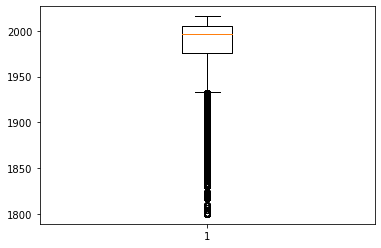

In [ ]:
B = plt.boxplot(data=df, x ='yr_of_estab')
[item.get_ydata()[1]  for item in B['whiskers']]

In [ ]:
df[df["yr_of_estab"].between(1800, 1933)].shape[0]

3291

In [ ]:
fliers_years_est = df[df["yr_of_estab"].between(1800, 1933)]

In [ ]:
fliers_years_est["yr_of_estab"].unique()

array([1897, 1924, 1884, 1880, 1909, 1933, 1847, 1890, 1838, 1864, 1913,
       1818, 1839, 1914, 1855, 1801, 1920, 1925, 1931, 1868, 1859, 1869,
       1917, 1896, 1843, 1850, 1906, 1912, 1898, 1923, 1911, 1851, 1865,
       1849, 1872, 1926, 1873, 1848, 1889, 1876, 1852, 1927, 1930, 1922,
       1878, 1834, 1928, 1800, 1861, 1846, 1885, 1907, 1817, 1841, 1821,
       1888, 1916, 1886, 1932, 1915, 1866, 1919, 1921, 1910, 1854, 1875,
       1904, 1879, 1899, 1900, 1837, 1887, 1929, 1857, 1877, 1918, 1902,
       1804, 1823, 1893, 1908, 1833, 1867, 1836, 1871, 1881, 1840, 1856,
       1845, 1863, 1858, 1874, 1892, 1853, 1894, 1883, 1860, 1819, 1905,
       1831, 1882, 1870, 1901, 1895, 1824, 1862, 1807, 1832, 1822, 1903,
       1810, 1820, 1809, 1891, 1830, 1842])

Values in "yr_of_estab" will be taken as real values

In [ ]:
## Analyzing "no_of_employees"

[-26.0, 7195.0]

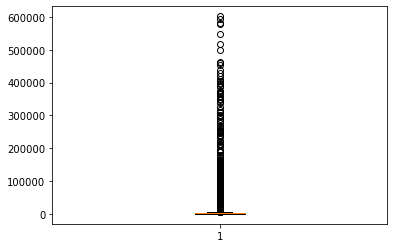

In [ ]:
B = plt.boxplot(data=df, x ='no_of_employees')
[item.get_ydata()[1]  for item in B['whiskers']]

In [ ]:
df["no_of_employees"].min()

-26

In [ ]:
df["no_of_employees"].max()

602069

In [ ]:
df[df["no_of_employees"].between(-26,0)].shape[0]

33

In [ ]:
df[df["no_of_employees"].between(0,10)].shape[0]

0

In [ ]:
neg_employees = df[df["no_of_employees"].between(-26,0)]
neg_employees["no_of_employees"].unique()

array([-25, -11, -17, -26, -14])

In [ ]:
pos = df[df["no_of_employees"].between(0,27)]
pos["no_of_employees"].unique()

array([18, 22, 20, 24, 27, 13, 16, 19, 23, 15, 21, 12])

In [ ]:
# Replacing negative values to positive values
df.replace({'no_of_employees' : {-25:25,-11:11,-17:17,-26:26,-14:14}}, inplace= True)

In [ ]:
df["no_of_employees"].min()

11

* Max value for "no_of_employees" will be taken as a real value. Companies such as amazon, walmart, etc., do have this many employees all over the world.

#### Feature engineering

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
print(df.continent.value_counts())
print(df.education_of_employee.value_counts())
print(df.has_job_experience.value_counts())
print(df.requires_job_training.value_counts())
print(df.region_of_employment.value_counts())
print(df.unit_of_wage.value_counts())
print(df.full_time_position.value_counts())
print(df.case_status.value_counts())


Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
# Conveting dictomic variables to 0/1 values
df['has_job_experience'] = df['has_job_experience'].apply(lambda x : 1 if x=='Y' else 0)
df['requires_job_training'] = df['requires_job_training'].apply(lambda x : 1 if x=='Y' else 0)
df['full_time_position'] = df['full_time_position'].apply(lambda x : 1 if x=='Y' else 0)
df['case_status'] = df['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

#### Preparing data for modeling

In [ ]:
df.drop('case_id',axis= 1, inplace=True) # Dropping case_id as it is irrelevant for any of the models 

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Bivariate EDA

case_status               1     0    All
region_of_employment                    
All                   17018  8462  25480
Northeast              4526  2669   7195
West                   4100  2486   6586
South                  4913  2104   7017
Midwest                3253  1054   4307
Island                  226   149    375


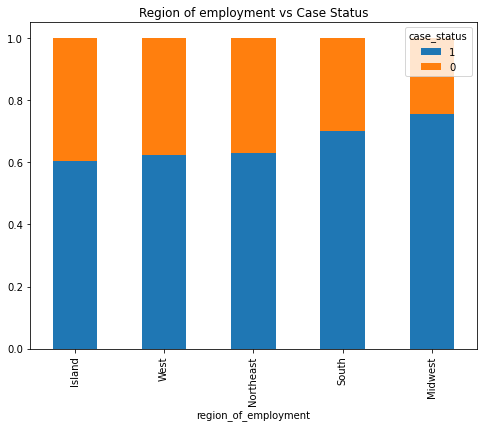

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['region_of_employment'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['region_of_employment'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Region of employment vs Case Status');

* Applicants being hired in Midwset are more likely to get certified followed by South region.

has_job_experience         0      1    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192


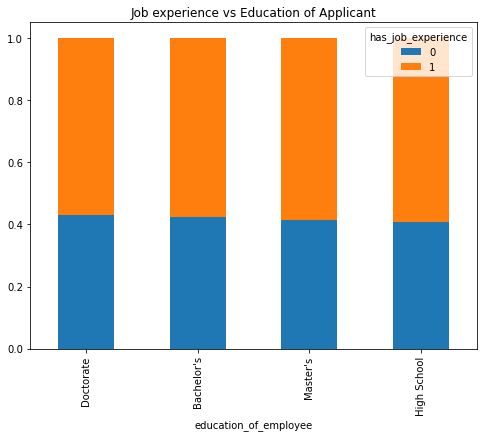

In [ ]:
sorter = df['has_job_experience'].value_counts().index[-1]
tab1 = pd.crosstab(df['education_of_employee'], df['has_job_experience'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['education_of_employee'], df['has_job_experience'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Job experience vs Education of Applicant');

* Independent of the applicants highest school level, between 43%-45% of applicants of each education level, do not have job experience. 

case_status                1     0    All
education_of_employee                    
All                    17018  8462  25480
Bachelor's              6367  3867  10234
High School             1164  2256   3420
Master's                7575  2059   9634
Doctorate               1912   280   2192


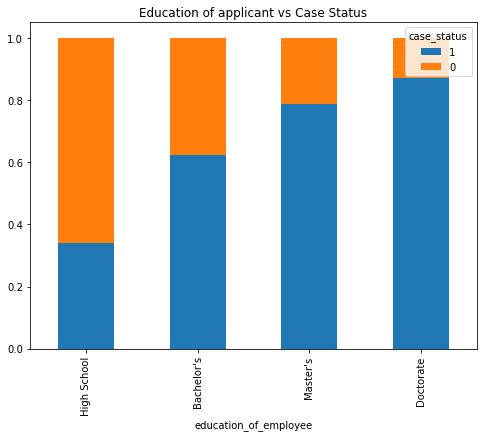

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['education_of_employee'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['education_of_employee'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Education of applicant vs Case Status');

* Applicants with High School as their highest education level get denied the most, while applicants with doctorates and master's degrees get rejected the least. 

case_status        1     0    All
continent                        
All            17018  8462  25480
Asia           11012  5849  16861
North America   2037  1255   3292
Europe          2957   775   3732
South America    493   359    852
Africa           397   154    551
Oceania          122    70    192


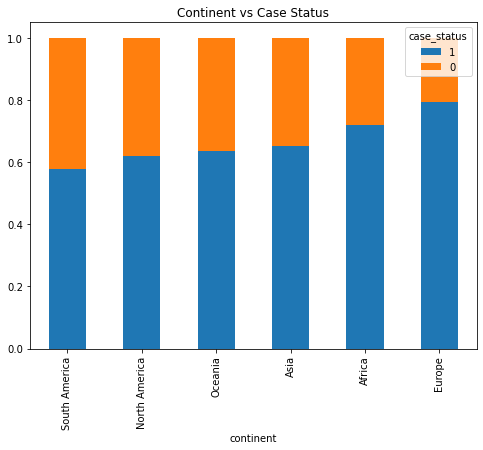

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['continent'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['continent'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Continent vs Case Status');

* South Americans get rejected the most, while Europeans get rejected the least. 

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192


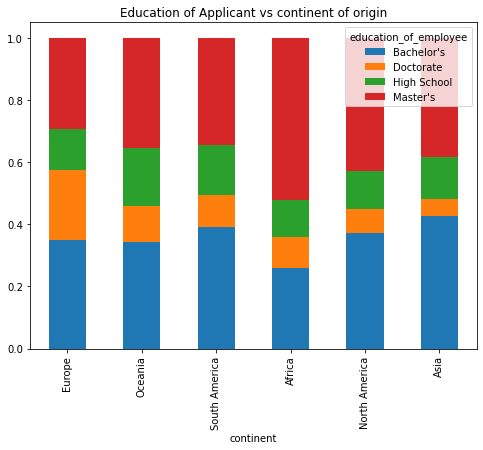

In [ ]:
sorter = df['education_of_employee'].value_counts().index[-1]
tab1 = pd.crosstab(df['continent'], df['education_of_employee'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['continent'], df['education_of_employee'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Education of Applicant vs continent of origin');

* Africa is the continent with the most applicants with a master degree, followed by North America and Asia. Europe is the continent with the least applicants with a master's degree.
* The country with the most bachellor degree applicants is Asia, followed by South America. The continent with the least bachellor's applicants is Africa.
* The continent with the most applicants with a doctorate degree is Europe, and the continent with the least doctorate applicants is Asia.
* The continent with the most applicants with High School as the their highest education level is Oceania, followed by South America.

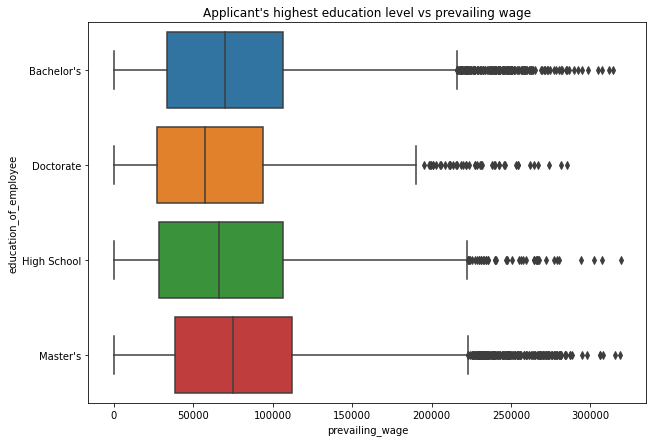

In [ ]:
plt.figure(figsize= (10,7))
sns.boxplot(data = df, y= 'education_of_employee', x = 'prevailing_wage')
plt.title("Applicant's highest education level vs prevailing wage");

* Applicants with a master degree have the highest median wage, while applicants with doctorate degrees have the lowest median wage.
* The highest wage corresponds to an applicant with just High School as their highest education level. 
* Outliers can be found in all education levels, however, even outliers for doctorate applicants are bellow Bachelor's, Master's and High School.

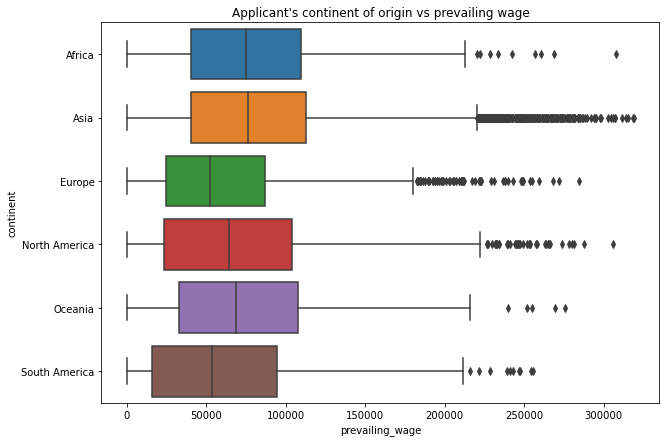

In [ ]:
plt.figure(figsize= (10,7))
sns.boxplot(data = df, y= 'continent', x = 'prevailing_wage')
plt.title("Applicant's continent of origin vs prevailing wage");

* Highest median wage corresponds to Asia followed by Africa.
* Europe and South America have the lowest median wage.
* Outliers are concentrated in Asian applicants.
* Asia has the highest wage.

full_time_position     0      1    All
continent                             
All                 2707  22773  25480
Asia                1941  14920  16861
North America        571   2721   3292
Europe               115   3617   3732
Africa                31    520    551
South America         31    821    852
Oceania               18    174    192


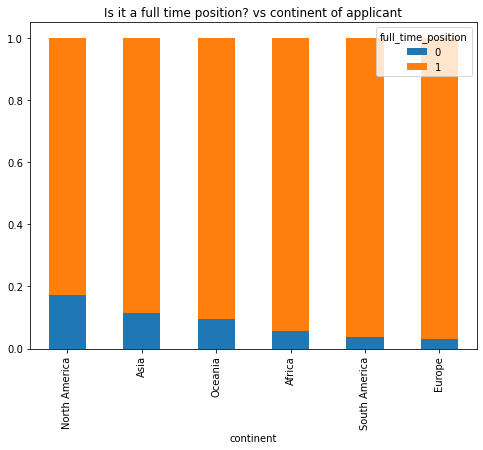

In [ ]:
sorter = df['full_time_position'].value_counts().index[-1]
tab1 = pd.crosstab(df['continent'], df['full_time_position'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['continent'], df['full_time_position'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Is it a full time position? vs continent of applicant');

* North American applicants have the least full-time positions followed by Asian applicants.
* European applicants lead full-time jobs followed by South Americans.

case_status             1     0    All
has_job_experience                    
All                 17018  8462  25480
0                    5994  4684  10678
1                   11024  3778  14802


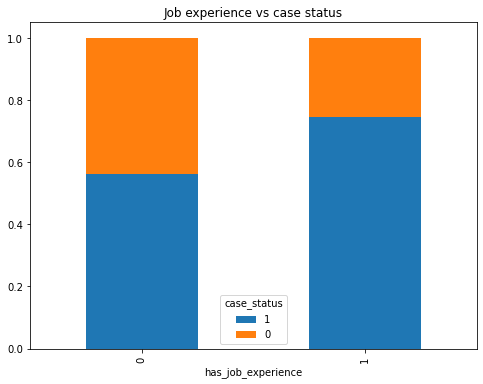

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['has_job_experience'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['has_job_experience'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Job experience vs case status');

* Candidates with job experience get certified the most.

case_status                1     0    All
requires_job_training                    
All                    17018  8462  25480
0                      15012  7513  22525
1                       2006   949   2955


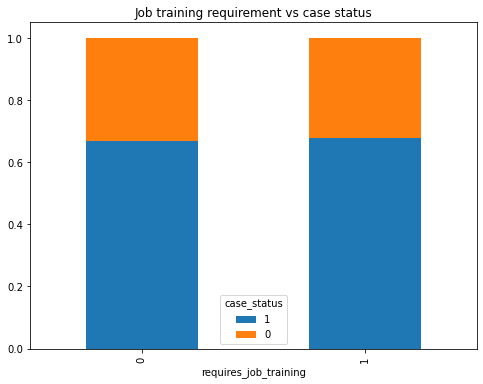

In [ ]:
sorter = df['case_status'].value_counts().index[-1]
tab1 = pd.crosstab(df['requires_job_training'], df['case_status'], margins=True).sort_values(by=sorter,ascending=False)
print(tab1)

tab = pd.crosstab(df['requires_job_training'], df['case_status'], normalize="index").sort_values(by=sorter, ascending=False)
ax = tab.plot(kind="bar", stacked=True, figsize=(8, 6))
ax.set_title('Job training requirement vs case status');

* Applicants that require job training and those who don't require job training have the same certification rate.

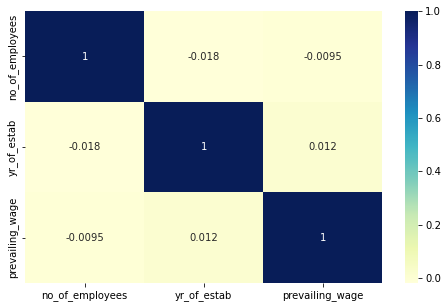

In [ ]:
plt.figure(figsize= (8,5))
sns.heatmap(data=df.corr(), annot=True, cbar=True, cmap='YlGnBu');  

* There is no correlation between the numerical variables.

## Building bagging and boosting models

###### Model can make wrong predictions as:

1. Predicting that an applicant will be certificated but doesn't have the qualifications to be granted the certification.
2. Predicting an applicant will not be certificated but has the qualifications to be granted the certification.

##### Which case is more important?
Both cases are important.
1. Approving certification but not having the qualifications takes the opportunity of nationals on taking the job. 
2. Denying the certification to someone that can greatly contribute to the company and the economy.

##### How to reduce this loss?

We must focus on F1 score to maximize  (reducing False Negatives and False Positives).

#### Creating a function to run the models' performances and creating a function to plot the predictions confusion matrix

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
   
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
   
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### BAGGING

In [ ]:
# Importing libraries 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats

In [ ]:
x = df.drop(['case_status'],axis=1)
y = df['case_status']

x = pd.get_dummies(x,drop_first=True)

In [ ]:
# Splitting data into training and test set:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)
print(x_train.shape, x_test.shape)

(17836, 21) (7644, 21)


In [ ]:
print(y.value_counts(1))
print(y_test.value_counts(1))

1    0.667896
0    0.332104
Name: case_status, dtype: float64
1    0.667844
0    0.332156
Name: case_status, dtype: float64


* Train and test set have the same 0/1 ratios.

In [ ]:
x.shape

(25480, 21)

#### Weighted Desicion Tree

In [ ]:
dtree_wt = DecisionTreeClassifier(criterion = 'gini', random_state=1, class_weight={0:0.67,1:0.33})
dtree_wt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

In [ ]:
dtree_wt_train_perf=model_performance_classification_sklearn(dtree_wt,x_train,y_train)
dtree_wt_train_perf = pd.DataFrame(dtree_wt_train_perf)
print("Training set performance")
dtree_wt_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


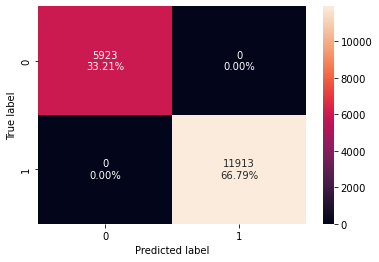

In [ ]:
confusion_matrix_sklearn(dtree_wt,x_train,y_train)

In [ ]:
dtree_wt_test_perf=model_performance_classification_sklearn(dtree_wt,x_test,y_test)
dtree_wt_test_perf = pd.DataFrame(dtree_wt_test_perf)
print("Testing set performance")
dtree_wt_test_perf

Testing set performance


,Accuracy,Recall,Precision,F1
0,0.649791,0.745544,0.734182,0.739819


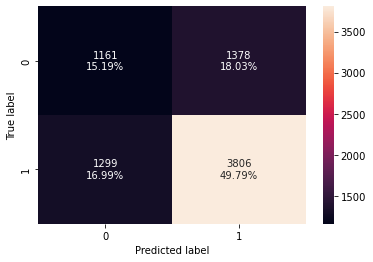

In [ ]:
confusion_matrix_sklearn(dtree_wt,x_test,y_test)

* For the test set, the model performance drops considerably for all performance scores, hence it's an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -35% Accuracy, -25% Recall, -27% Precision, and -26% F1-score.

In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
prevailing_wage                    0.270715
no_of_employees                    0.239403
yr_of_estab                        0.167216
education_of_employee_High School  0.073124
has_job_experience_1               0.054672
education_of_employee_Master's     0.027112
education_of_employee_Doctorate    0.020847
continent_Europe                   0.020419
requires_job_training_1            0.016127
region_of_employment_Midwest       0.016000
full_time_position_1               0.015951
region_of_employment_South         0.014739
region_of_employment_Northeast     0.014157
region_of_employment_West          0.012710
continent_Asia                     0.011878
continent_North America            0.009362
continent_South America            0.006707
unit_of_wage_Year                  0.003948
continent_Oceania                  0.002567
unit_of_wage_Week                  0.001575
unit_of_wage_Month                 0.000769


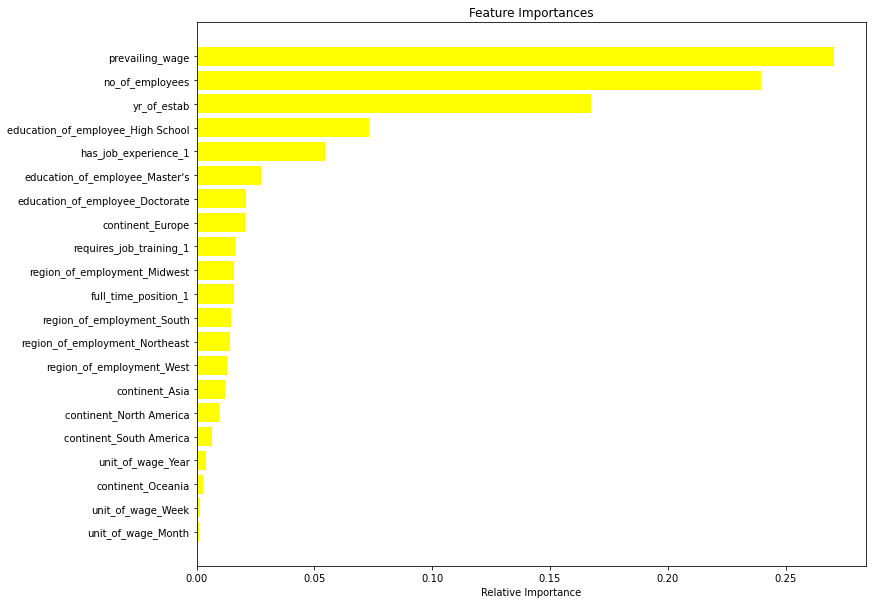

In [ ]:
feature_names = x_train.columns
importances = dtree_wt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Weighted Decision Tree prediction: `prevailing_wage`, `no_of_employees`, `yr_of_estab`, `education_of_employee_HighSchool`, `has_job_experience_yes`.

#### Desicion tree - Hyperparameter Tuning

In [ ]:
# Checking the depht of the default tree
DecisionTreeClassifier.get_depth(dtree)

40

In [ ]:
# Checking the number of leaves of the default tree
DecisionTreeClassifier.get_n_leaves(dtree)

4692

In [ ]:
# Choose the type of classifier. 
dtree_wt_tune = DecisionTreeClassifier(random_state=1, class_weight={0:0.67,1:0.33})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(3,43,10), 
              'min_samples_leaf': [10,50,100],
              "min_impurity_decrease": [0.0001, 0.001]
             }

# F_1 scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Grid search
grid_obj = GridSearchCV(dtree_wt_tune, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_wt_tune = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_wt_tune.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=13,
                       min_impurity_decrease=0.001, min_samples_leaf=100,
                       random_state=1)

In [ ]:
dtree_wt_tune_train_perf=model_performance_classification_sklearn(dtree_wt_tune,x_train,y_train)
dtree_wt_tune_train_perf = pd.DataFrame(dtree_wt_tune_train_perf)
print("Training set performance")
dtree_wt_tune_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.747141,0.828003,0.800325,0.813929


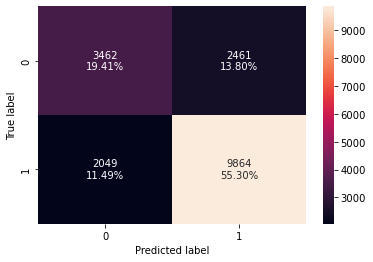

In [ ]:
confusion_matrix_sklearn(dtree_wt_tune,x_train,y_train)

In [ ]:
dtree_wt_tune_test_perf=model_performance_classification_sklearn(dtree_wt_tune,x_test,y_test)
dtree_wt_tune_test_perf = pd.DataFrame(dtree_wt_tune_test_perf)
print("Testing set performance")
dtree_wt_tune_test_perf

Testing set performance


,Accuracy,Recall,Precision,F1
0,0.736656,0.824486,0.790274,0.807018


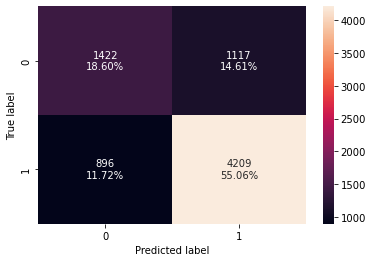

In [ ]:
confusion_matrix_sklearn(dtree_wt_tune,x_test,y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -1.40% Accuracy, -0.42% Recall, -1.26% Precision, and -0.85% F1-score.
* This Weighted Tuned Decision Tree model throws a fairly good F1_score.

In [ ]:
print(pd.DataFrame(dtree_wt_tune.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.309172
has_job_experience_1               0.217934
prevailing_wage                    0.117052
education_of_employee_Master's     0.095478
continent_Europe                   0.074795
education_of_employee_Doctorate    0.074518
region_of_employment_Midwest       0.039493
region_of_employment_South         0.027878
full_time_position_1               0.019022
region_of_employment_Northeast     0.014214
region_of_employment_West          0.010443
continent_South America            0.000000
yr_of_estab                        0.000000
continent_Oceania                  0.000000
requires_job_training_1            0.000000
continent_North America            0.000000
continent_Asia                     0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000
unit_of_wage_Year                  0.000000
no_of_employees                    0.000000


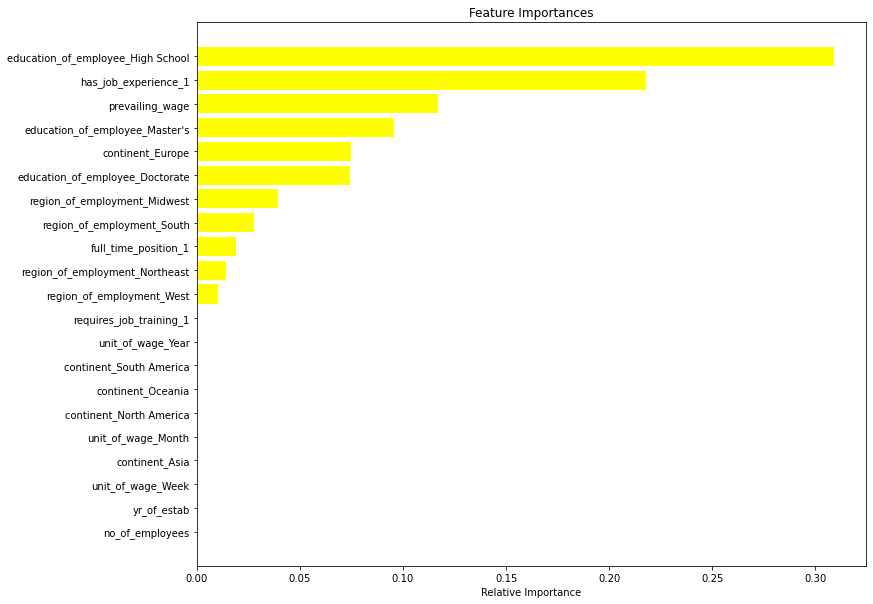

In [ ]:
feature_names = x_train.columns
importances = dtree_wt_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Weighted Tuned Decision Tree prediction: `education_of_employee_High School`, `has_job_experience_yes`, `prevailing_wage`, `education_of_employee_Master's`, `continent_Europe`

* In this Weighted Tuned Decision Tree these features were not considered important: `continent_South America`,
`yr_of_estab`, `continent_Oceania`, `requires_job_training_1`, `continent_North America`, `continent_Asia`, `unit_of_wage_Month`, `unit_of_wage_Week`, `unit_of_wage_Year`, `no_of_employees`.

#### Random Forest - Weighted

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.67,1:0.33}, random_state=1)
rf_wt.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

In [ ]:
rf_wt_train_perf=model_performance_classification_sklearn(rf_wt,x_train,y_train)
rf_wt_train_perf = pd.DataFrame(rf_wt_train_perf)
print("Training set performance")
rf_wt_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


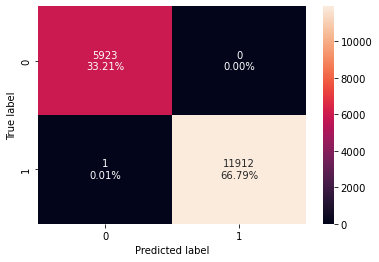

In [ ]:
confusion_matrix_sklearn(rf_wt,x_train,y_train)

In [ ]:
rf_wt_test_perf=model_performance_classification_sklearn(rf_wt,x_test,y_test)
rf_wt_test_perf = pd.DataFrame(rf_wt_test_perf)
print("Test set performance")
rf_wt_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.723312,0.843683,0.765825,0.802871


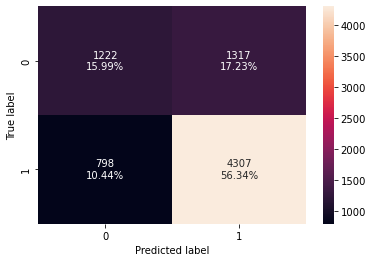

In [ ]:
confusion_matrix_sklearn(rf_wt,x_test,y_test)

* For the test set, the model performance drops considerably for all performance scores, hence is an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -28% Accuracy, -16% Recall, -23% Precision, and -20% F1-score.

In [ ]:
print(pd.DataFrame(rf_wt.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
prevailing_wage                    0.254682
no_of_employees                    0.235723
yr_of_estab                        0.190888
education_of_employee_High School  0.065079
has_job_experience_1               0.051883
education_of_employee_Master's     0.042107
education_of_employee_Doctorate    0.021764
unit_of_wage_Year                  0.017807
continent_Europe                   0.017224
full_time_position_1               0.014822
requires_job_training_1            0.014691
region_of_employment_Midwest       0.011312
continent_Asia                     0.011222
region_of_employment_West          0.010304
region_of_employment_South         0.009828
continent_North America            0.009700
region_of_employment_Northeast     0.009380
continent_South America            0.006171
continent_Oceania                  0.002462
unit_of_wage_Week                  0.001889
unit_of_wage_Month                 0.001065


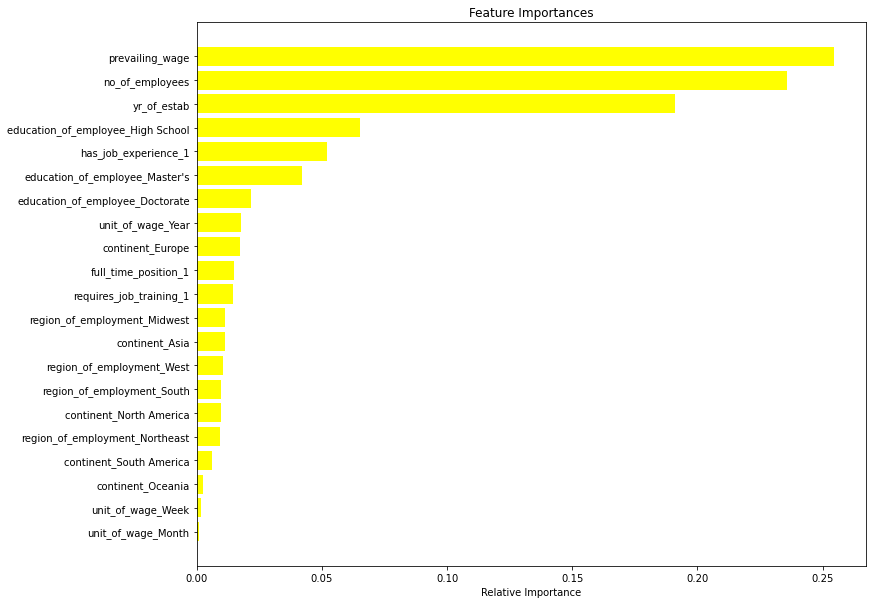

In [ ]:
feature_names = x_train.columns
importances = rf_wt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Weighted Random Forest prediction: `prevailing_wage`, `no_of_employees`, `yr_of_estab`, `education_of_employee_HighSchool`, `has_job_experience_yes`, `education_of_employee_Master`.

#### Weighted Random Forest - Hyperparameter Tuning


In [ ]:
# Choose the type of classifier. 
rf_wt_tune = RandomForestClassifier(class_weight={0:0.67,1:0.33},random_state=1, bootstrap=True)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": np.arange(15, 26, 5),
        "min_samples_split": [5,10],
        "max_features": ['log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_wt_tune, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_wt_tune = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_wt_tune.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_features='log2',
                       max_samples=0.7, min_samples_split=5, n_estimators=25,
                       random_state=1)

In [ ]:
rf_wt_tune_train_perf=model_performance_classification_sklearn(rf_wt_tune, x_train,y_train)
rf_wt_tune_train_perf = pd.DataFrame(rf_wt_tune_train_perf)
print("Training set performance")
rf_wt_tune_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.924423,0.946781,0.940465,0.943612


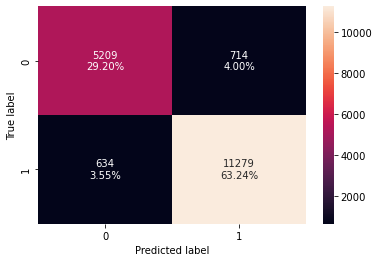

In [ ]:
confusion_matrix_sklearn(rf_wt_tune, x_train,y_train)

In [ ]:
rf_wt_tune_test_perf=model_performance_classification_sklearn(rf_wt_tune, x_test,y_test)
rf_wt_tune_test_perf = pd.DataFrame(rf_wt_tune_test_perf)
print("Test set performance")
rf_wt_tune_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.719126,0.818217,0.774092,0.795543


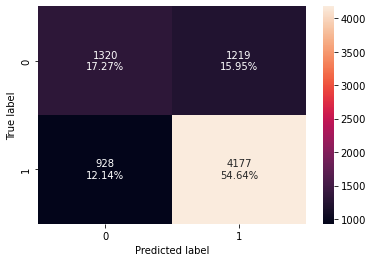

In [ ]:
confusion_matrix_sklearn(rf_wt_tune, x_test,y_test)

* For the test set, the model performance drops considerably for all performance scores, hence is an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -22% Accuracy, -14% Recall, -18% Precision, and -16% F1-score.

In [ ]:
print(pd.DataFrame(rf_wt_tune.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
prevailing_wage                    0.235570
no_of_employees                    0.212194
yr_of_estab                        0.175826
education_of_employee_High School  0.078170
has_job_experience_1               0.062094
education_of_employee_Master's     0.050728
education_of_employee_Doctorate    0.025668
continent_Europe                   0.021484
unit_of_wage_Year                  0.019608
full_time_position_1               0.017331
requires_job_training_1            0.016270
continent_Asia                     0.014225
region_of_employment_Midwest       0.013040
region_of_employment_West          0.011897
continent_North America            0.011387
region_of_employment_South         0.010957
region_of_employment_Northeast     0.010246
continent_South America            0.006784
continent_Oceania                  0.002879
unit_of_wage_Week                  0.002279
unit_of_wage_Month                 0.001363


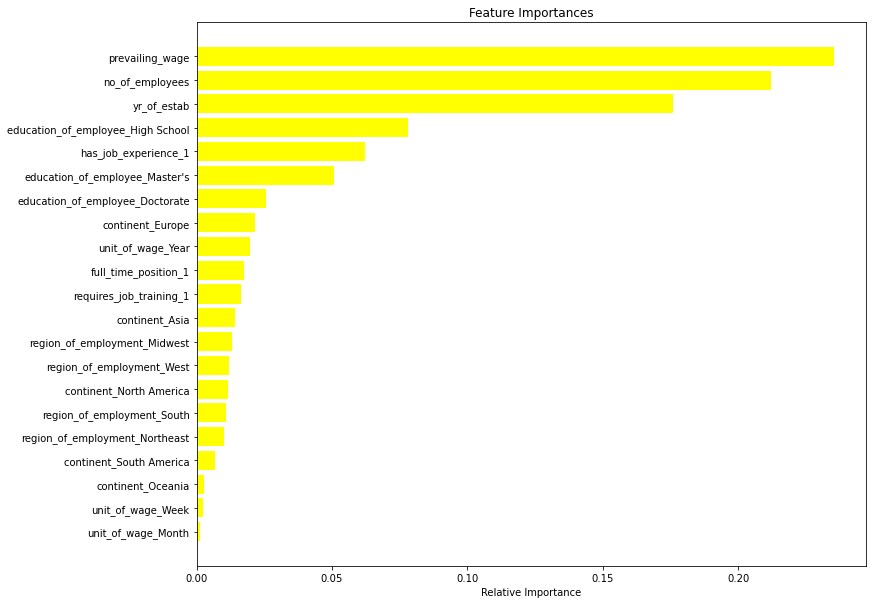

In [ ]:
feature_names = x_train.columns
importances = rf_wt_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Weighted Tuned Random Forest prediction: `prevailing_wage`, `no_of_employees`, `yr_of_estab`, `education_of_employee_HighSchool`, `has_job_experience_yes`, `education_of_employee_Master`.

#### Bagging

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
bagging_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
bagging_train_perf = pd.DataFrame(bagging_train_perf)
print("Training set performance")
bagging_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


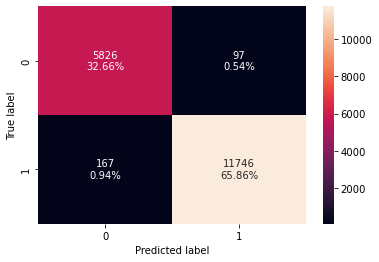

In [ ]:
confusion_matrix_sklearn(bagging, x_train, y_train)

In [ ]:
bagging_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
bagging_test_perf = pd.DataFrame(bagging_test_perf)
print("Test set performance")
bagging_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


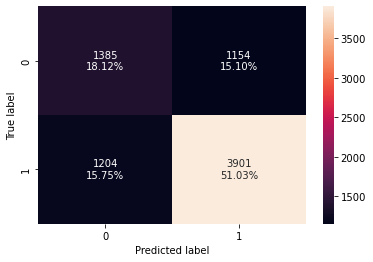

In [ ]:
confusion_matrix_sklearn(bagging, x_test, y_test)

* For the test set, the model performance drops considerably for all performance scores, hence is an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -30% Accuracy, -22% Recall, -22% Precision, and -22% F1-score.

#### Bagging - with weighted desicion tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1),random_state=1)
bagging_wt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  random_state=1)

In [ ]:
bagging_wt_train_perf=model_performance_classification_sklearn(bagging_wt, x_train, y_train)
bagging_wt_train_perf = pd.DataFrame(bagging_wt_train_perf)
print("Training set performance")
bagging_wt_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.984021,0.983967,0.992045,0.987989


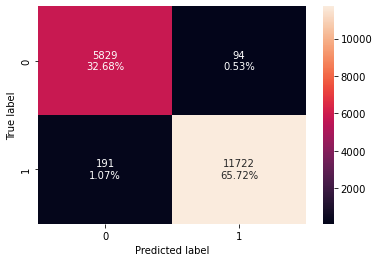

In [ ]:
confusion_matrix_sklearn(bagging_wt, x_train, y_train)

In [ ]:
bagging_wt_test_perf=model_performance_classification_sklearn(bagging_wt, x_test, y_test)
bagging_wt_test_perf = pd.DataFrame(bagging_wt_test_perf)
print("Test set performance")
bagging_wt_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.688252,0.754163,0.773403,0.763662


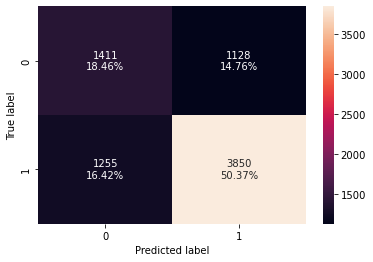

In [ ]:
confusion_matrix_sklearn(bagging_wt, x_test, y_test)

* For the test set, the model performance drops considerably for all performance scores hence it is an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -30% Accuracy, -23% Recall, -22% Precision, and -23% F1-score.

#### Bagging - Hyperparameter Tuning

In [ ]:
#bagging_tune = BaggingClassifier(random_state=1)
bagging_wt_tune = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1),random_state=1)

# Grid parameters
parameters = {
    "max_samples": [0.7,0.8,0.9],
    "max_features": [0.7,0.8,0.9],
    "n_estimators": np.arange(50, 150, 25),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_wt_tune, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

bagging_wt_tune = grid_obj.best_estimator_

bagging_wt_tune.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  max_features=0.7, max_samples=0.7, n_estimators=125,
                  random_state=1)

In [ ]:
bagging_wt_tune_train_perf=model_performance_classification_sklearn(bagging_wt_tune, x_train, y_train)
bagging_wt_tune_train_perf = pd.DataFrame(bagging_wt_tune_train_perf)
print("Training set performance")
bagging_wt_tune_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.995403,0.999916,0.993246,0.99657


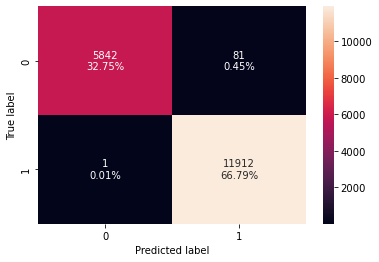

In [ ]:
confusion_matrix_sklearn(bagging_wt_tune, x_train, y_train)

In [ ]:
bagging_wt_tune_test_perf=model_performance_classification_sklearn(bagging_wt_tune, x_test, y_test)
bagging_wt_tune_test_perf = pd.DataFrame(bagging_wt_tune_test_perf)
print("Test set performance")
bagging_wt_tune_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.728022,0.895593,0.747303,0.814755


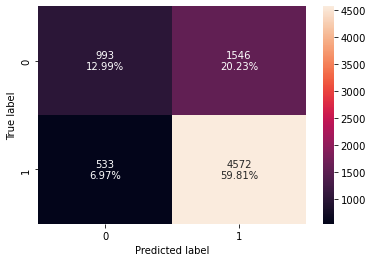

In [ ]:
confusion_matrix_sklearn(bagging_wt_tune, x_test, y_test)

* For the test set, the model performance drops considerably for all performance scores hence it is an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -27% Accuracy, -10% Recall, -25% Precision, and -18% F1-score.

### BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
!pip install xgboost 
from xgboost import XGBClassifier


#### Adaboost

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
abc_train_perf=model_performance_classification_sklearn(abc, x_train, y_train)
abc_train_perf = pd.DataFrame(abc_train_perf)
print("Training set performance")
abc_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


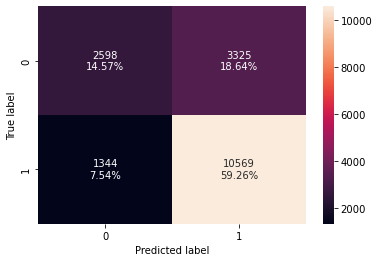

In [ ]:
confusion_matrix_sklearn(abc, x_train, y_train)

In [ ]:
abc_test_perf=model_performance_classification_sklearn(abc, x_test, y_test)
abc_test_perf = pd.DataFrame(abc_test_perf)
print("Test set performance")
abc_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


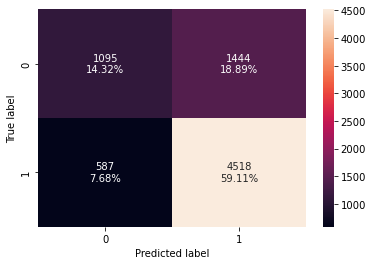

In [ ]:
confusion_matrix_sklearn(abc, x_test, y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -0.53% Accuracy, -0.24% Recall, -0.38% Precision, and -0.32% F1-score.
* This basic Adaboost model throws a fairly good F1_score.

In [ ]:
print(pd.DataFrame(abc.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
prevailing_wage                    0.36
no_of_employees                    0.24
yr_of_estab                        0.08
education_of_employee_Master's     0.06
education_of_employee_High School  0.04
region_of_employment_Midwest       0.04
continent_Europe                   0.02
continent_North America            0.02
unit_of_wage_Week                  0.02
region_of_employment_West          0.02
region_of_employment_South         0.02
full_time_position_1               0.02
has_job_experience_1               0.02
education_of_employee_Doctorate    0.02
continent_South America            0.02
continent_Asia                     0.00
region_of_employment_Northeast     0.00
unit_of_wage_Month                 0.00
continent_Oceania                  0.00
unit_of_wage_Year                  0.00
requires_job_training_1            0.00


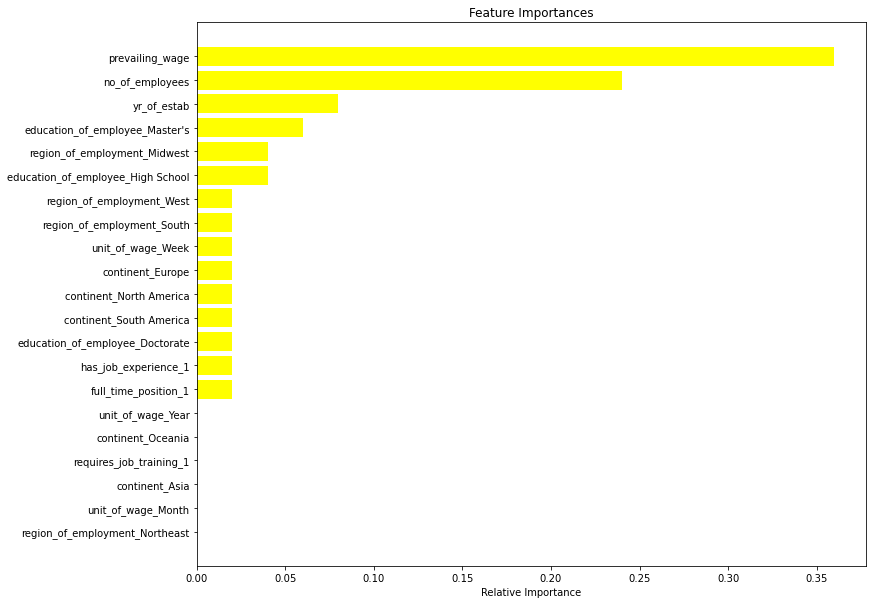

In [ ]:
feature_names = x_train.columns
importances = abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Adaboost prediction: `prevailing_wage`, `no_of_employees`
* For the Adaboost prediction these features were not important: `continent_Asia`,   `region_of_employment_Northeast`, `unit_of_wage_Month`, `continent_Oceania`, `unit_of_wage_Year`  and `requires_job_training_yes`.

#### Adaboost - Hyperparameter Tuning

In [ ]:
abc_tune = AdaBoostClassifier(random_state=1)


parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": np.arange(80,111,10),
    "learning_rate":np.arange(0.1,1,0.2)
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tune, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

abc_tune = grid_obj.best_estimator_

abc_tune.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
abc_tune_train_perf=model_performance_classification_sklearn(abc_tune, x_train, y_train)
abc_tune_train_perf = pd.DataFrame(abc_tune_train_perf)
print("Training set performance")
abc_tune_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.749215,0.881306,0.774377,0.824389


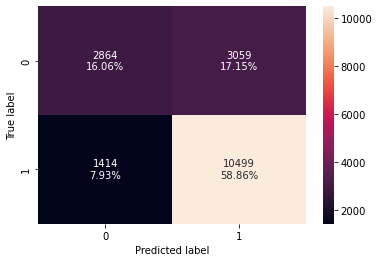

In [ ]:
confusion_matrix_sklearn(abc_tune, x_train, y_train)

In [ ]:
abc_tune_test_perf=model_performance_classification_sklearn(abc_tune, x_test, y_test)
abc_tune_test_perf = pd.DataFrame(abc_tune_test_perf)
print("Test set performance")
abc_tune_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.737049,0.873653,0.765665,0.816102


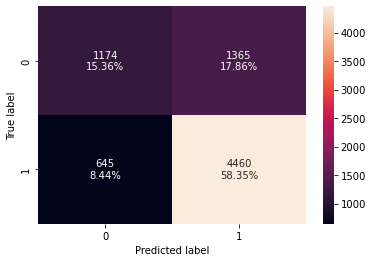

In [ ]:
confusion_matrix_sklearn(abc_tune, x_test, y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -1.62% Accuracy, -0.87% Recall, -1.13% Precision, and -1.01% F1-score.
* This Tuned Adaboost model throws a fairly good F1_score.

In [ ]:
print(pd.DataFrame(abc_tune.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.139112
education_of_employee_Master's     0.116589
prevailing_wage                    0.109258
has_job_experience_1               0.102159
education_of_employee_Doctorate    0.077960
continent_Europe                   0.076550
region_of_employment_South         0.071704
region_of_employment_Midwest       0.070421
no_of_employees                    0.053981
yr_of_estab                        0.045244
unit_of_wage_Year                  0.039498
full_time_position_1               0.027367
continent_North America            0.016503
region_of_employment_West          0.015854
continent_South America            0.014890
requires_job_training_1            0.012598
region_of_employment_Northeast     0.005630
continent_Asia                     0.004684
continent_Oceania                  0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


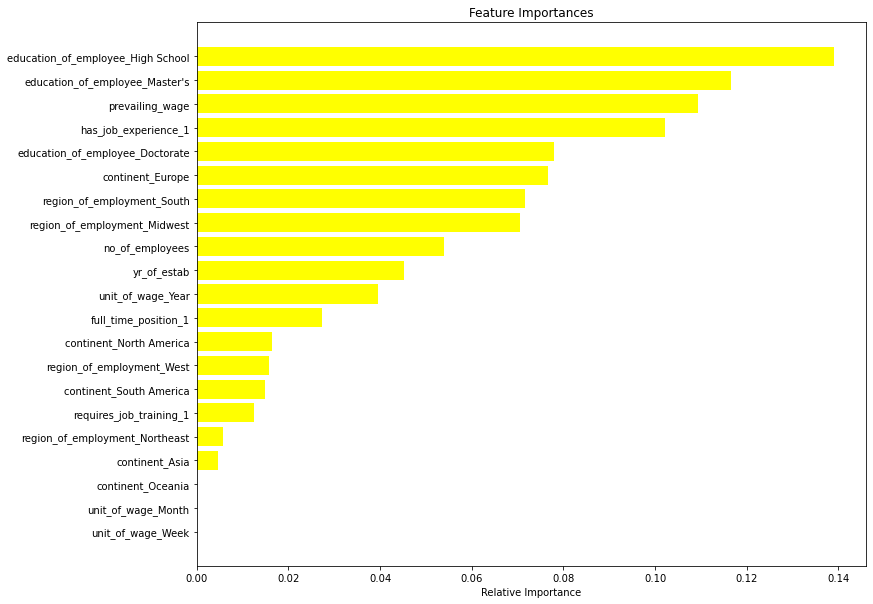

In [ ]:
feature_names = x_train.columns
importances = abc_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Adaboost tuned prediction: `education_of_employee_High School`, `education_of_employee_Master's`, `prevailing_wage, has_job_experience_yes`.
* For the Tuned Adaboost prediction there are 3 features that were not important:  `unit_of_wage_Month`, `continent_Oceania`, `unit_of_wage_Week`.

#### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
gb_train_perf=model_performance_classification_sklearn(gb, x_train, y_train)
gb_train_perf = pd.DataFrame(gb_train_perf)
print("Training set performance")
gb_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


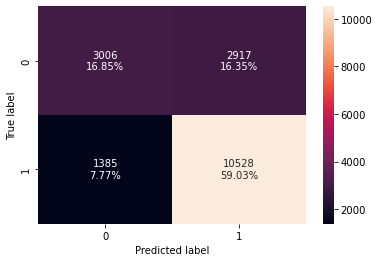

In [ ]:
confusion_matrix_sklearn(gb, x_train, y_train)

In [ ]:
gb_test_perf=model_performance_classification_sklearn(gb, x_test, y_test)
gb_test_perf = pd.DataFrame(gb_test_perf)
print("Test set performance")
gb_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


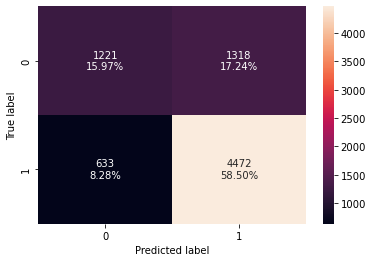

In [ ]:
confusion_matrix_sklearn(gb, x_test, y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -1.85% Accuracy, -0.88% Recall, -1.36% Precision, and -1.13% F1-score.
* This basic Gradient Boosting model throws a fairly good F1_score.

In [ ]:
print(pd.DataFrame(gb.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.285978
has_job_experience_1               0.155462
prevailing_wage                    0.136663
education_of_employee_Master's     0.087565
education_of_employee_Doctorate    0.083538
continent_Europe                   0.063035
unit_of_wage_Year                  0.036526
region_of_employment_Midwest       0.034432
region_of_employment_South         0.019024
no_of_employees                    0.014866
continent_North America            0.014537
yr_of_estab                        0.014220
region_of_employment_West          0.013583
continent_Asia                     0.011354
full_time_position_1               0.009000
region_of_employment_Northeast     0.008039
continent_South America            0.007043
requires_job_training_1            0.004692
continent_Oceania                  0.000311
unit_of_wage_Month                 0.000133
unit_of_wage_Week                  0.000000


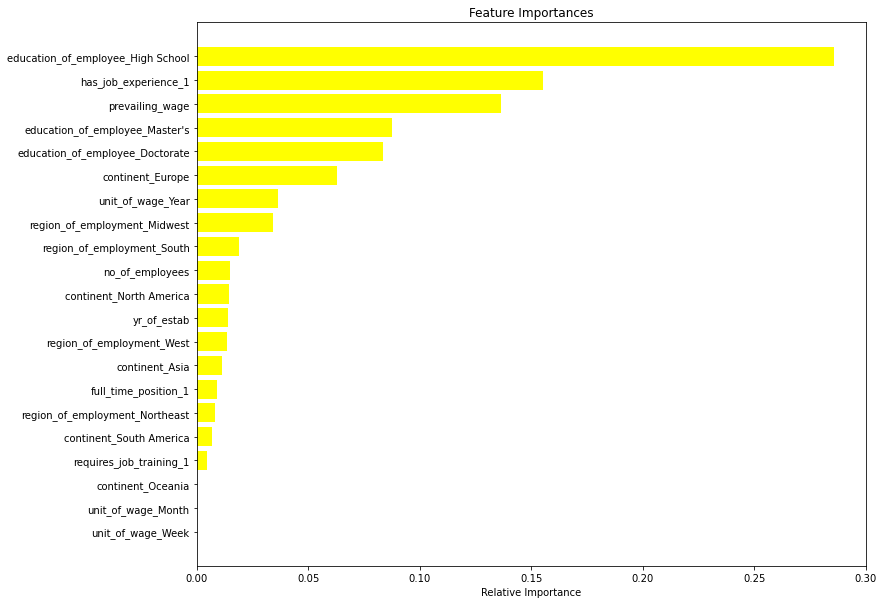

In [ ]:
feature_names = x_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Gradient Boosting prediction: `education_of_employee_High School`, `has_job_experience_yes`, `prevailing_wage`, `education_of_employee_Master's`, `education_of_employee_Doctorate`
* For the Gradient Boosting prediction this features were not important: `unit_of_wage_Week`

#### Gradient Boosting - Hyperparameter Tuning

In [ ]:
gb_tune = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {'n_estimators': np.arange(50,250,50), 
              'subsample':[0.7,0.9],
              'max_features':[0.7,0.9],
              'min_samples_leaf':[10,30,50]
              }

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gb_tune, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

gb_tune = grid_obj.best_estimator_

gb_tune.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, min_samples_leaf=30,
                           n_estimators=50, random_state=1, subsample=0.9)

In [ ]:
gb_tune_train_perf=model_performance_classification_sklearn(gb_tune, x_train, y_train)
gb_tune_train_perf = pd.DataFrame(gb_tune_train_perf)
print("Training set performance")
gb_tune_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.755326,0.886175,0.778253,0.828715


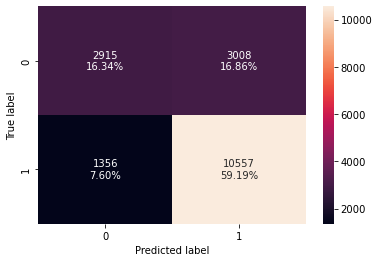

In [ ]:
confusion_matrix_sklearn(gb_tune, x_train, y_train)

In [ ]:
gb_tune_test_perf=model_performance_classification_sklearn(gb_tune, x_test, y_test)
gb_tune_test_perf = pd.DataFrame(gb_tune_test_perf)
print("Test set performance")
gb_tune_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.743459,0.879726,0.76927,0.820799


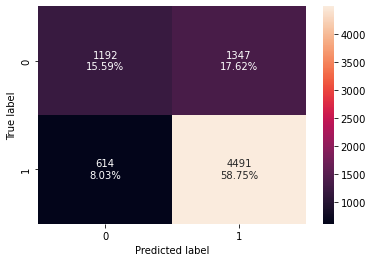

In [ ]:
confusion_matrix_sklearn(gb_tune, x_test, y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -1.57% Accuracy, -0.73% Recall, -1.15% Precision, and -0.96% F1-score.
* This Tuned Gradient Boosting model throws a fairly good F1_score.

In [ ]:
print(pd.DataFrame(gb_tune.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.286076
has_job_experience_1               0.169667
prevailing_wage                    0.121869
education_of_employee_Master's     0.104985
education_of_employee_Doctorate    0.090387
continent_Europe                   0.057833
unit_of_wage_Year                  0.043643
region_of_employment_Midwest       0.032351
region_of_employment_South         0.019976
continent_North America            0.014007
region_of_employment_West          0.013542
continent_Asia                     0.008385
region_of_employment_Northeast     0.007664
no_of_employees                    0.007389
continent_South America            0.007010
yr_of_estab                        0.006517
full_time_position_1               0.006441
requires_job_training_1            0.002257
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000
continent_Oceania                  0.000000


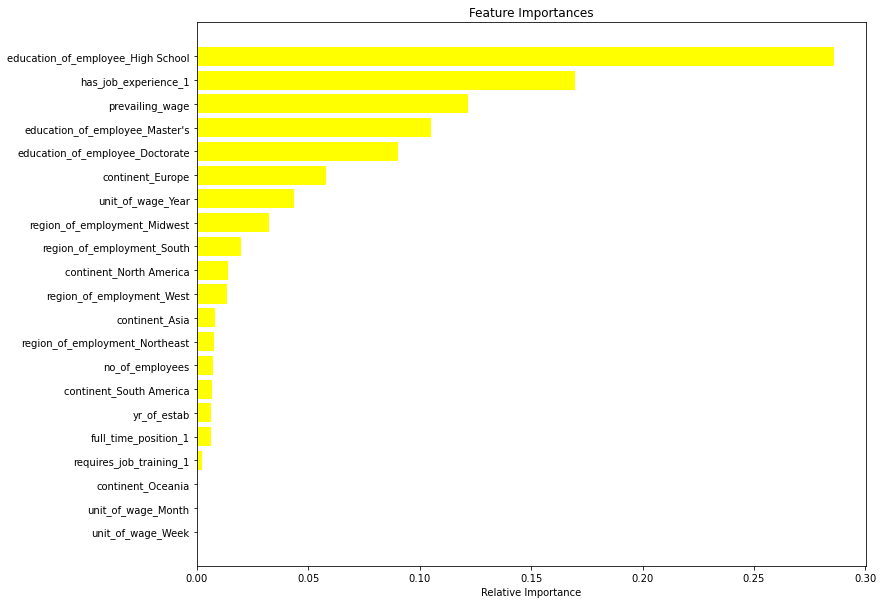

In [ ]:
feature_names = x_train.columns
importances = gb_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Tuned Gradient Boosting prediction: `education_of_employee_High School`, `has_job_experience_yes`, `prevailing_wage`, `education_of_employee_Master's`, `education_of_employee_Doctorate`
* For the Tuned Gradient Boosting prediction this features were not important: `unit_of_wage_Week`, `unit_of_wage_Month`, `continent_Oceania`.

#### XG Boost

In [ ]:
xgb = XGBClassifier(random_state=1, verbosity = 0)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
xgb_train_perf=model_performance_classification_sklearn(xgb, x_train, y_train)
xgb_train_perf = pd.DataFrame(xgb_train_perf)
print("Training set performance")
xgb_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


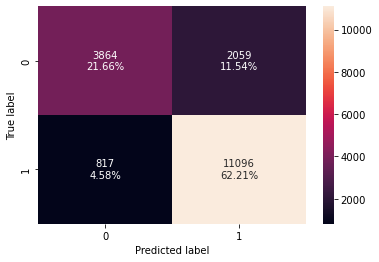

In [ ]:
confusion_matrix_sklearn(xgb, x_train, y_train)

In [ ]:
xgb_test_perf=model_performance_classification_sklearn(xgb, x_test, y_test)
xgb_test_perf = pd.DataFrame(xgb_test_perf)
print("Test set performance")
xgb_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


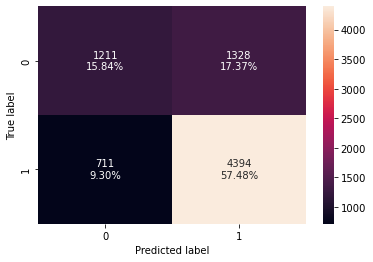

In [ ]:
confusion_matrix_sklearn(xgb, x_test, y_test)

* For the test set, the model performance drops considerably for all performance scores hence it is an overfit model.
* Percentual changes in performance scores between train and test data were as followed: -13% Accuracy, -8% Recall, -9% Precision, and -8% F1-score.

In [ ]:
print(pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.272220
education_of_employee_Doctorate    0.126113
has_job_experience_1               0.088554
continent_Europe                   0.082862
education_of_employee_Master's     0.061248
region_of_employment_Midwest       0.046815
unit_of_wage_Year                  0.039491
region_of_employment_South         0.036837
full_time_position_1               0.035373
continent_South America            0.024389
requires_job_training_1            0.022184
continent_North America            0.021058
region_of_employment_West          0.019642
continent_Asia                     0.018652
prevailing_wage                    0.018163
unit_of_wage_Month                 0.016767
region_of_employment_Northeast     0.016000
unit_of_wage_Week                  0.015273
no_of_employees                    0.013677
yr_of_estab                        0.013121
continent_Oceania                  0.011564


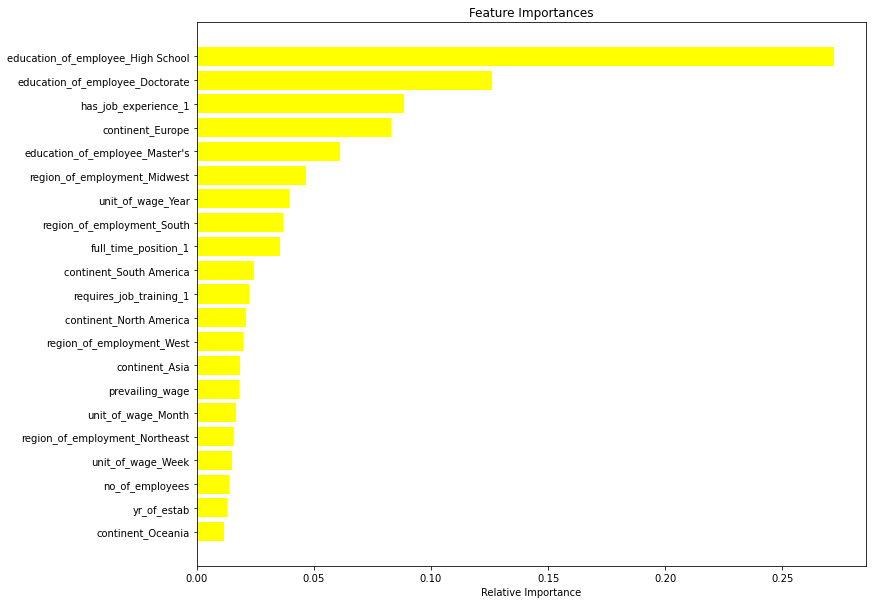

In [ ]:
feature_names = x_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the XGBoosting prediction: `education_of_employee_High School`, `education_of_employee_Doctorate`, `has_job_experience_yes`, `continent_Europe`, `education_of_employee_Master's`

#### XGBoost - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tune = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = { "n_estimators": [50,100,150,200],
    "scale_pos_weight":[2,3],
    "subsample":[0.7,0.9],
    "learning_rate": [0.1,0.2],
    "gamma":[3,5],
    "colsample_bytree":[0.7,0.8]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tune, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tune = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tune.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [ ]:
xgb_tune_train_perf=model_performance_classification_sklearn(xgb_tune, x_train, y_train)
xgb_tune_train_perf = pd.DataFrame(xgb_tune_train_perf)
print("Training set performance")
xgb_tune_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.752915,0.970956,0.740146,0.839984


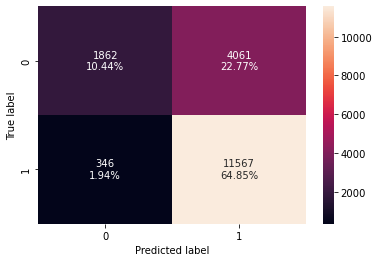

In [ ]:
confusion_matrix_sklearn(xgb_tune, x_train, y_train)

In [ ]:
xgb_tune_test_perf=model_performance_classification_sklearn(xgb_tune, x_test, y_test)
xgb_tune_test_perf = pd.DataFrame(xgb_tune_test_perf)
print("Test set performance")
xgb_tune_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.721481,0.955338,0.719534,0.820836


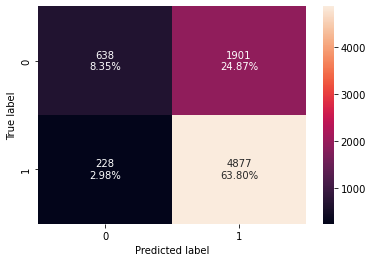

In [ ]:
confusion_matrix_sklearn(xgb_tune, x_test, y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -4% Accuracy, -2% Recall, -3% Precision, and -2% F1-score.
* This Tuned XGBoosting tuned model throws a fairly good F1_score.

In [ ]:
print(pd.DataFrame(xgb_tune.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.338312
education_of_employee_Doctorate    0.102352
education_of_employee_Master's     0.083233
has_job_experience_1               0.075019
unit_of_wage_Year                  0.048840
continent_Europe                   0.046276
region_of_employment_Midwest       0.035858
full_time_position_1               0.031603
region_of_employment_South         0.029323
continent_Asia                     0.027221
region_of_employment_Northeast     0.026121
prevailing_wage                    0.023568
region_of_employment_West          0.020325
requires_job_training_1            0.018149
continent_North America            0.016154
unit_of_wage_Week                  0.016090
continent_South America            0.015471
unit_of_wage_Month                 0.013679
yr_of_estab                        0.011927
no_of_employees                    0.011831
continent_Oceania                  0.008648


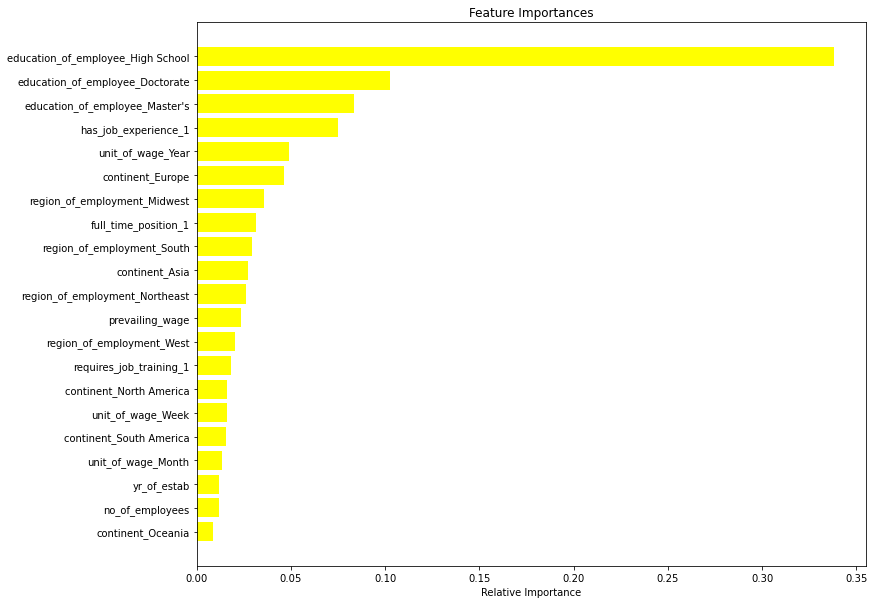

In [ ]:
feature_names = x_train.columns
importances = xgb_tune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for the Tuned XGBoosting prediction: `education_of_employee_High School`, `education_of_employee_Doctorate`, `education_of_employee_Master's`, `has_job_experience_yes`.

#### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
## Best performance metrics in test data with no overfitting were given by the Tuned Desicion Tree, 
## Adaboost, Tuned Adaboost, Gradient Boosting, and Tuned Gradient Boosting.
## Using each one of these models and using Gradient Boosting as the final estimator for being the best estimator 
## based on the test set performance metrics.

estimators=[('Adaboost', abc),('Desicion Tree tune', dtree_tune),
           ('Gradient Boosting tuned', gb_tune)]
final_estimator= GradientBoostingClassifier(random_state=1)

In [ ]:
stacking=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Adaboost', AdaBoostClassifier(random_state=1)),
                               ('Desicion Tree tune',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=13,
                                                       min_impurity_decrease=0.001,
                                                       min_samples_leaf=100,
                                                       random_state=1)),
                               ('Gradient Boosting tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           min_samples_leaf=30,
                                                           n_est

In [ ]:
stacking_train_perf=model_performance_classification_sklearn(stacking, x_train, y_train)
stacking_train_perf = pd.DataFrame(stacking_train_perf)
print("Training set performance")
stacking_train_perf

Training set performance


,Accuracy,Recall,Precision,F1
0,0.755326,0.882062,0.780278,0.828054


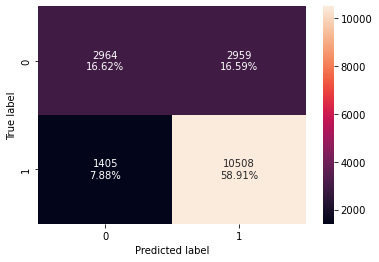

In [ ]:
confusion_matrix_sklearn(stacking, x_train, y_train)

In [ ]:
stacking_test_perf=model_performance_classification_sklearn(stacking, x_test, y_test)
stacking_test_perf = pd.DataFrame(stacking_test_perf)
print("Test set performance")
stacking_test_perf

Test set performance


,Accuracy,Recall,Precision,F1
0,0.743851,0.876592,0.771153,0.820499


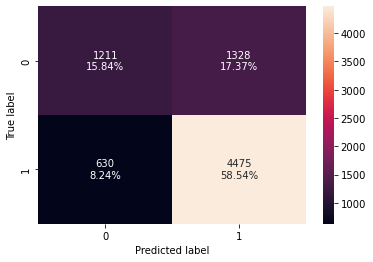

In [ ]:
confusion_matrix_sklearn(stacking, x_test, y_test)

* All performing test metrics are doing lower than the test metrics, however, the decrease does not exceed 5%, hence the model is not overfitted.
* Percentual changes in performance scores between train and test data were as followed: -2% Accuracy, -1% Recall, -1% Precision, and -1% F1-score.
* This Stacking model throws a fairly good F1_score.

## Model Performance Comparison and Conclusions

In [ ]:
model_train_comp_df = pd.concat(
    [
        dtree_wt_train_perf.T,
        dtree_wt_tune_train_perf.T,
        rf_wt_train_perf.T,
        rf_wt_tune_train_perf.T,
        bagging_train_perf.T,
        bagging_wt_train_perf.T,
        bagging_wt_tune_train_perf.T,
        abc_train_perf.T,
        abc_tune_train_perf.T,
        gb_train_perf.T,
        gb_tune_train_perf.T,
        xgb_train_perf.T,
        xgb_tune_train_perf.T,
        stacking_train_perf.T
    ],
    axis=1,
)
model_train_comp_df.columns = [
    "Wt RF",
    "WT RF Tuned",
    "WT RF",
    "WT RF Tuned",
    "Bagging",
    "Wt Bagging",
    "Wt Bagging Tuned",
    "AdaB",
    "AdaB Tune",
    "GradientB",
    "GB Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking"
]

print("Training set models performance comparison:")
model_train_comp_df

Training set models performance comparison:


,Wt RF,WT RF Tuned,WT RF,WT RF Tuned,Bagging,Wt Bagging,Wt Bagging Tuned,AdaB,AdaB Tune,GradientB,GB Tuned,XGB,XGB Tuned,Stacking
Accuracy,1.0,0.747141,0.999944,0.924423,0.985198,0.984021,0.995403,0.738226,0.749215,0.758802,0.755326,0.838753,0.752915,0.755326
Recall,1.0,0.828003,0.999916,0.946781,0.985982,0.983967,0.999916,0.887182,0.881306,0.883740,0.886175,0.931419,0.970956,0.882062
Precision,1.0,0.800325,1.000000,0.940465,0.991810,0.992045,0.993246,0.760688,0.774377,0.783042,0.778253,0.843482,0.740146,0.780278
F1,1.0,0.813929,0.999958,0.943612,0.988887,0.987989,0.996570,0.819080,0.824389,0.830349,0.828715,0.885272,0.839984,0.828054


In [ ]:
model_test_comp_df = pd.concat(
    [
        dtree_wt_test_perf.T,
        dtree_wt_tune_test_perf.T,
        rf_wt_test_perf.T,
        rf_wt_tune_test_perf.T,
        bagging_test_perf.T,
        bagging_wt_test_perf.T,
        bagging_wt_tune_test_perf.T,
        abc_test_perf.T,
        abc_tune_test_perf.T,
        gb_test_perf.T,
        gb_tune_test_perf.T,
        xgb_test_perf.T,
        xgb_tune_test_perf.T,
        stacking_test_perf.T
        
    ],
    axis=1,
)
model_test_comp_df.columns = [
    "Wt RF",
    "WT RF Tuned",
    "WT RF",
    "WT RF Tuned",
    "Bagging",
    "Wt Bagging",
    "Wt Bagging Tuned",
    "AdaB",
    "AdaB Tune",
    "GradientB",
    "GB Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking"
    
]

print("Testing set model performance comparison:")
model_test_comp_df

Testing set model performance comparison:


,Wt RF,WT RF Tuned,WT RF,WT RF Tuned,Bagging,Wt Bagging,Wt Bagging Tuned,AdaB,AdaB Tune,GradientB,GB Tuned,XGB,XGB Tuned,Stacking
Accuracy,0.649791,0.736656,0.723312,0.719126,0.691523,0.688252,0.728022,0.734301,0.737049,0.744767,0.743459,0.733255,0.721481,0.743851
Recall,0.745544,0.824486,0.843683,0.818217,0.764153,0.754163,0.895593,0.885015,0.873653,0.876004,0.879726,0.860725,0.955338,0.876592
Precision,0.734182,0.790274,0.765825,0.774092,0.771711,0.773403,0.747303,0.757799,0.765665,0.772366,0.769270,0.767913,0.719534,0.771153
F1,0.739819,0.807018,0.802871,0.795543,0.767913,0.763662,0.814755,0.816481,0.816102,0.820927,0.820799,0.811675,0.820836,0.820499


* The best model with no overfitting and the highest F1-score is the Gradient Boosting model.

## Actionable Insights and Recommendations

* The best model for prediction is the Gradient Boosting with a F1_score of 0.82 for the test data set and no overfitting (percentual change is bellow 5% between train and set performance scores). 


* This will help increase the efficiency of the process and shortlisting the candidates that have higher chances of being certified, however, even though F1_socre is high, this score components are a Recall score of 0.88 and a Precision score of 0.78 which means that the model is still having a high chance of predicting an applicant being certified when it should not be. 

* We can see there are 8 variables - education_of_employee_High School, has_job_experience_yes, prevailing_wage, education_of_employee_Master's, education_of_employee_Doctorate, continent_Europe, unit_of_wage_Year, region_of_employment_Midwest - that are the most important features in identifying whether an applicant will be certified or not.


* The only variables that resulted irrelevant for the prediction as unit_of_wage_Week, while these other variables have the least relevance: full_time_position_yes, region_of_employment_Northeast, continent_South America, requires_job_training_yes, continent_Oceania, unit_of_wage_Month.


* Based on the above analysis we can say that:
 1. Applicants with High School as their highest degree of education are most likely get denied. 
 2. Applicants with job experience are more likely to get certified.
 3. Applicants with a master’s degree are more likely to get certified.
 4. Applicants with a Doctorate Degree are more likely to get certified.
 5. Applicants coming from Europe are more likely to get certified.
 
##### Suitable profile based on the Gradient Boosting model:
 
Suitable profile for applicants whom the visa should be certified based on the drivers:

* Applicant with a master’s degree/Doctorate Degree who has job experience, comes from Europe, has a yearly prevailing wage, and applies for the Midwest region.

Suitable profile for applicants whom the visa should not be granted based on the drivers:

* Applicant with High School as their highest degree level with no previous job experience and no yearly prevailing wage.

##### Recommendations:
* Based on the low Precision, companies who hire international talent are recommended to implement a 3–6-month testing period for the applicant to see if they actually makes a good fit in the company and fulfill the expectations. 
*  We suggest this testing periods to be remote before the company gets involved in all the operational costs of hiring an international worker.


###### Additional observation:

* Variable "prevailing_wage" values are out of proportion for some hourly, daily, weekly, and yearly wages since they are way too above or below the minimum Labor Department USA wage. Changing values for those observations would have meant changing the structure of the database in about a 13%.
